BatchGaussianDyBM Time-series Prediction Demo
========================================

- Author: Rudy Raymond

- Date: Apr. 19, 2017.

- (C) Copyright IBM Corp. 2016


Example
-------
In this example, we show how to use the BatchGaussianDyBM in order to a model and predict the next pattern in a noisy sine wave. We train BatchGaussianDyBM in batch manner by fitting to the first half of time series and run the model (without updating its internal parameters) on the rest of time series. 


Learning RMSE : 0.04494
Testing  RMSE : 0.04526


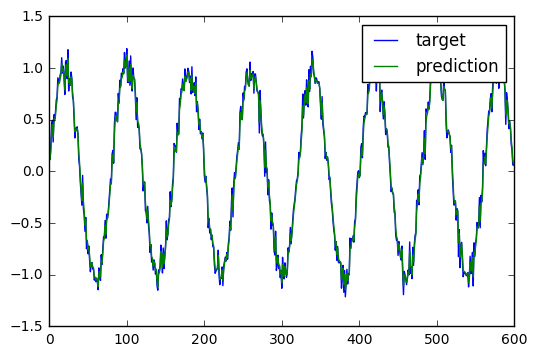

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from pydybm.time_series.rnn_gaussian_dybm import GaussianDyBM
from pydybm.base.generator import NoisySin
from sklearn.metrics import mean_squared_error
from pydybm.time_series.batch_gaussian_dybm import BatchGaussianDyBM
import numpy as np

def MSE(y_true,y_pred):
    """
    Function to calculate the mean squared error of a sequence of predicted vectors

    y_true : array, shape(L,N)
    y_pred : array, shape(L,N)

    mean of (dy_1^2 + ... + dy_N^2 ) over L pairs of vectors (y_true[i],y_pred[i])
    """
    MSE_each_coordinate = mean_squared_error(y_true,y_pred,multioutput="raw_values")
    return np.sum(MSE_each_coordinate)

def RMSE(y_true,y_pred):
    """
    Function to calculate the root mean squared error of a sequence of predicted vectors

    y_true : array, shape(L,N)
    y_pred : array, shape(L,N)

    squared root of the mean of (dy_1^2 + ... + dy_N^2 ) over L pairs of vectors (y_true[i],y_pred[i])
    """
    return np.sqrt(MSE(y_true,y_pred))

# Prepare a generator of noisy sine wave time-series
length = 600  # length of the time-series
period = 80   # period of the sine wave
std = 0.1     # standard deviation of the noise
dim = 1       # dimension of the time-series
timeSeries = NoisySin(length,period,std,dim)

max_iter = 10  #  maximum number of learning epochs/iterations to run

#  setting DyBM hyperparameters
delay = 2
decay = 0.3


#  Create and initialize a BatchGaussianDyBM
dybm = BatchGaussianDyBM(dim,delay=delay,decay_rates=[decay])

#  get sequences of time series because batch cannot learn from generator
npTimeSeries = np.array(timeSeries.to_list())

dybm.fit(npTimeSeries[0:length//2])   #  fit DyBM with half of time series

#initialize DyBM
dybm.init_state()

#  RMSE of learning
result = dybm.predict(timeSeries)
result = np.array(result.to_list())
learnError = RMSE(result[:length//2], npTimeSeries[:length//2])
print ("Learning RMSE : %.5f" %(learnError))

testError = RMSE(result[length//2:], npTimeSeries[length//2:])
print ("Testing  RMSE : %.5f" %(testError))

# Plot the time-series and prediction 

plt.plot(npTimeSeries,label="target")
plt.plot(result,label="prediction")
plt.legend()